In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [22]:
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [23]:
df=pd.read_csv('../../1_data/dataset/sqli.csv')

In [24]:
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset Shape: (30919, 2)

Columns: ['Query', 'Label']

First few rows:


,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [25]:
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Basic Statistics:")
df.describe()

Data Types:
Query    object
Label     int64
dtype: object

Missing Values:
Query    0
Label    0
dtype: int64

Basic Statistics:


,Label
count,30919.000000
mean,0.368123
std,0.482303
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [26]:
print("Class Distribution:")
print(df['Label'].value_counts())
print("\nClass Proportions:")
print(df['Label'].value_counts(normalize=True))


Class Distribution:
Label
0    19537
1    11382
Name: count, dtype: int64

Class Proportions:
Label
0    0.631877
1    0.368123
Name: proportion, dtype: float64


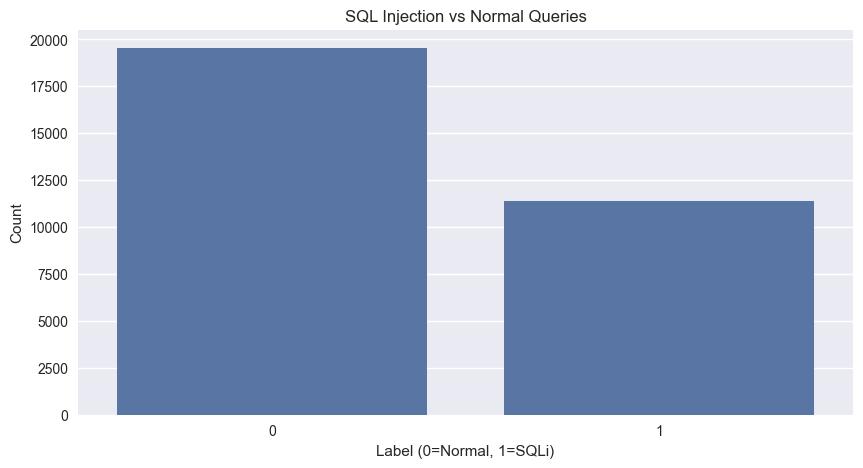

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Label')
plt.title('SQL Injection vs Normal Queries')
plt.xlabel('Label (0=Normal, 1=SQLi)')
plt.ylabel('Count')
plt.show()

In [28]:
df['query_length'] = df['Query'].str.len()

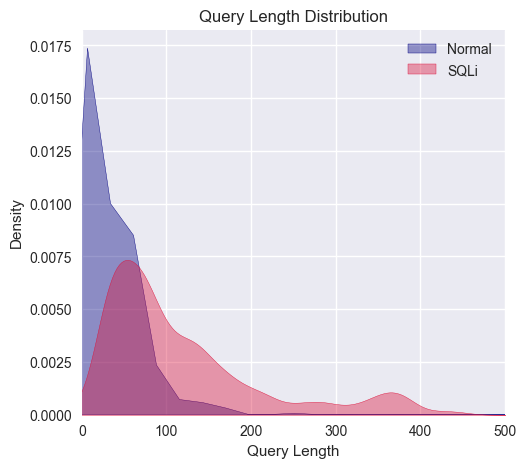

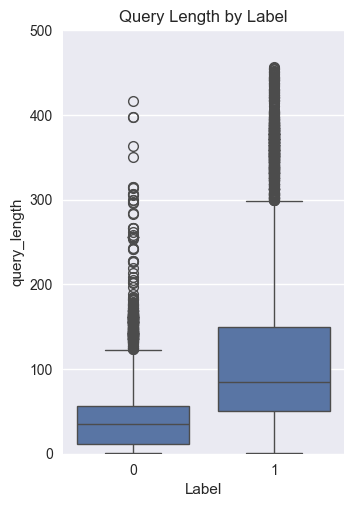

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(df[df['Label']==0]['query_length'], color='navy', fill=True, alpha=0.4, label='Normal')
sns.kdeplot(df[df['Label']==1]['query_length'], color='crimson', fill=True, alpha=0.4, label='SQLi')

plt.xlim(0, 500)
plt.xlabel('Query Length')
plt.ylabel('Density')
plt.title('Query Length Distribution')
plt.legend()
plt.show()



plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Label', y='query_length')
plt.title('Query Length by Label')
plt.ylim(0, 500)
plt.show()

In [30]:
sqli_queries = df[df['Label']==1]['Query']


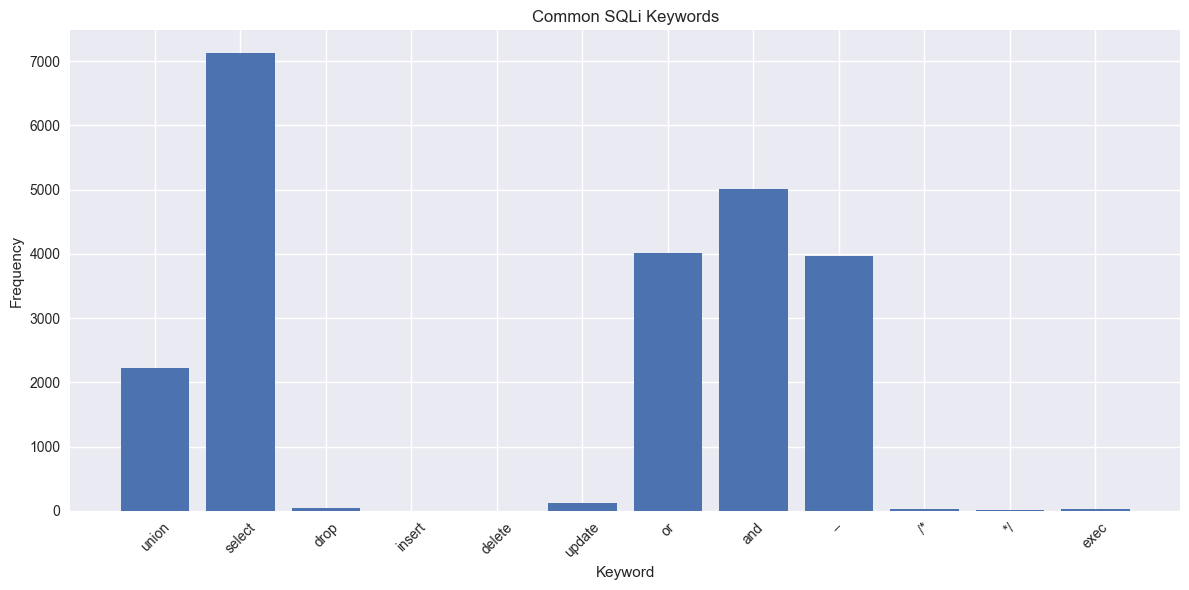

In [31]:
keywords = ['union', 'select', 'drop', 'insert', 'delete', 
            'update', 'or', 'and', '--', '/*', '*/', 
            'exec']

keyword_counts = {}
for keyword in keywords:
    count = sqli_queries.str.contains(keyword, case=False, regex=False).sum()
    keyword_counts[keyword] = count

plt.figure(figsize=(12, 6))
plt.bar(keyword_counts.keys(), keyword_counts.values())
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Common SQLi Keywords')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
print("Sample Normal Queries:")
print(df[df['Label']==0]['Query'].head(10).tolist())
print("\n" + "="*80 + "\n")
print("Sample SQLi Queries:")
print(df[df['Label']==1]['Query'].head(10).tolist())

Sample Normal Queries:
['99745017c', 'ejerci78', '47209', 'calle valencia de don juan 161, 7?d', 'b3r3al', '46942381w', 'elder@parcalia.hn', '24596413y', 'compte', '2366']


Sample SQLi Queries:
['" or pg_sleep  (  __TIME__  )  --', 'create user name identified by pass123 temporary tablespace temp default tablespace users;', " AND 1  =  utl_inaddr.get_host_address   (    (   SELECT DISTINCT  (  table_name  )   FROM   (  SELECT DISTINCT  (  table_name  )  , ROWNUM AS LIMIT FROM sys.all_tables  )   WHERE LIMIT  =  5   )    )    AND 'i'  =  'i", " select * from users where id  =  '1' or @ @1  =  1 union select 1,version  (    )   -- 1'", ' select * from users where id  =  1 or 1#"  (   union select 1,version  (    )   -- 1', " select name from syscolumns where id   =     (  select id from sysobjects where name   =   tablename'  )  --", 'select * from users where id  =  1 +$+ or 1  =  1 -- 1', '1;  (  load_file  (  char  (  47,101,116,99,47,112,97,115,115,119,100   )    )     )  ,1,1,1;', 